# MILESTONES 1

# 1 - Introduction
- Nama : Anggara Sutisna
- Batch: 016
- Phase: 2
- Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Background
**PT. Telco is** a company that has products and services such as telephone, internet, online security, online backup, device protection, technical support, and TV and movie streaming. In facing service competition in the market, companies need to know the behavior of their customers.
<br><br>
**Customer churn** is defined as when a customer stops service from the company. In this highly competitive sector, the telecom industry has an annual churn rate of 15-25%. Customer layoffs in the telecommunications industry pose one of the most significant risks to lost revenue. Since it costs up to 25 times more to acquire new customers than it costs to retain them, cultivating customer loyalty is the key.
<br><br>
the company hires a data scientist to do the analysis
1. What is the behavior of customers who end up being churn?
2. Does the monthly service contract affect the occurrence of churn?
3. How many customers end up being churn based on the charges?
4. What is the percentage of churn when viewed by tenure?
5. Classify to predict whether a customer will churn or not! and choose the best model


## Objectives
Creating a `Classification` model to predict `Customers Churn` using the `Artificial Neural Network Algorithm`

# 2 - Import Libraries
The first step in this project is to prepare the libraries that will be used during modeling.

In [ ]:
!pip install dython

In [ ]:
pip install matplotlib==3.1.3

In [77]:
#main library
import numpy as np
import pandas as pd
import scipy.stats as stats

#visualization
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_validate
from dython.nominal import associations
from imblearn.over_sampling import SMOTENC

#algorithm and evaluation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from yellowbrick.classifier import ConfusionMatrix

#deploy
import joblib
import pickle
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# 3 - Data Loading
The dataset that we have obtained in csv format will be loaded into the datafame with the `read_csv()` function in pandas.

In [4]:
#load dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

Displays the first 5 data from the dataset that has been entered into the dataframe.

In [5]:
#view 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Next we can display the last 5 data in the dataset

In [6]:
#view 5 rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Next we will look at the dimensions of the dataset with the `.shape` function

In [7]:
df.shape

(7043, 21)

There are `7043 rows` and `21 columns` in the dataset, then we can see which columns are available

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

For convenience in data manipulation, each column name will be lowercase

In [9]:
df.columns = df.columns.str.casefold()

In [10]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

# 4 - Exploratory Data Analysis (EDA)
In this section we will explore to understand all the data, several processes will be carried out, namely:
- Grouping
- Filtering
- Query  
- Visualization

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


From the data above it is known that there are only columns with data types with `type int, object and float`, based on the number of rows `no missing values are seen` in the dataset. Furthermore, for the totalcharges column, we will first change it to float form because the value contains the amount of currency in usd.

In [12]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [13]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Based on the descriptive statistics above, the following information is obtained: <br>
- Tenure has a fairly close mean and median between 32 - 29
- total charges have mean, median and max values which are quite far away, namely 2283 (mean) - 1397 (median) - 9684 (max)

In [14]:
df[df['totalcharges'] == 8684.800000]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.8,8684.8,Yes


In [15]:
df[df['monthlycharges'] == 118.750000	]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No


**Insight:** 
- customer id 2889-FPWRM: The company lost a customer with a tenure of 72 months. Of course this is an example of something that is detrimental to the company and must be identified further
- cutomer id 7569-NMZYQ: Companies must try to maintain customer loyalty so that churn does not occur as in the first case

#### Visualization

<AxesSubplot: ylabel='churn'>

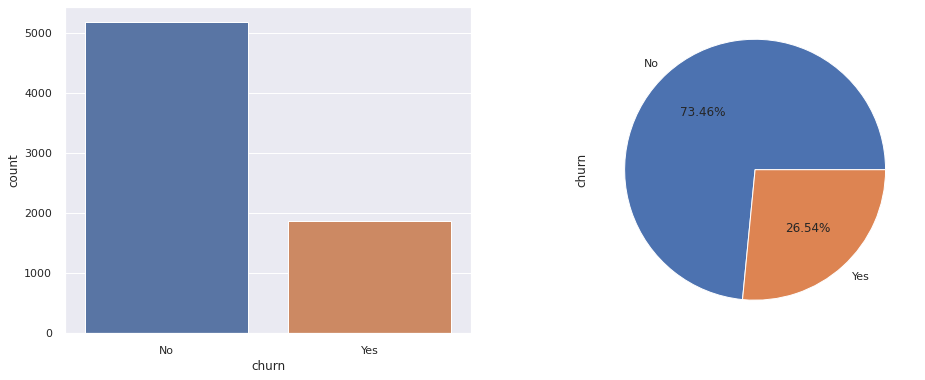

In [16]:
sns.set(style='darkgrid')
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(data=df, x='churn')
plt.subplot(1,2,2)
df['churn'].value_counts().plot(kind ='pie', autopct = '%1.2f%%')

**Insight:** from the results of the visualization above, there are 26.54% of customers who churn. This data churn class is included in the imbalance data category.

<AxesSubplot: ylabel='totalcharges'>

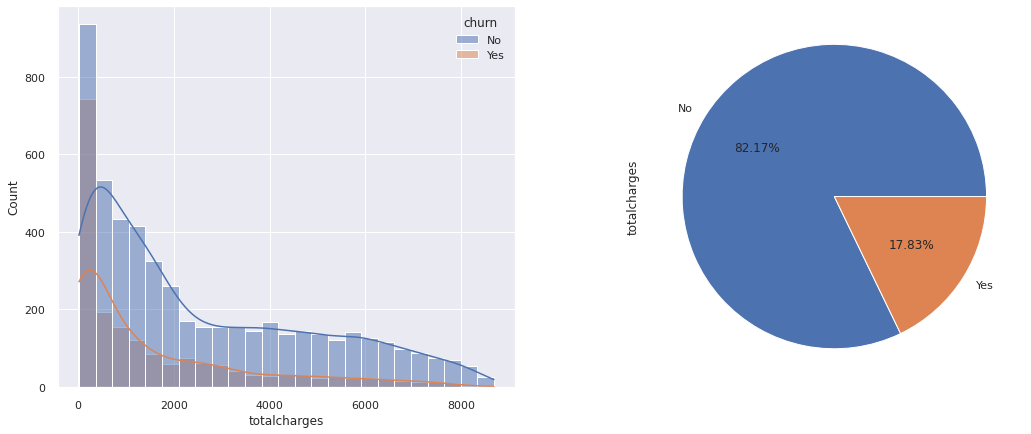

In [17]:
plt.figure(figsize=(18,7))
sns.set(style='darkgrid')
plt.subplot(1,2,1)
sns.histplot(data=df, x='totalcharges', hue='churn', kde=True)
plt.subplot(1,2,2)
df.groupby('churn')['totalcharges'].sum().plot(kind ='pie', autopct = '%1.2f%%')

**Insight:** From the results of a comparison of total charges between customers who churn or don't:
- churn:no = 82.17%
- churn:yes = 17.83%

<AxesSubplot: title={'center': 'Customer Churn'}, xlabel='tenure', ylabel='Jumlah Pelanggan'>

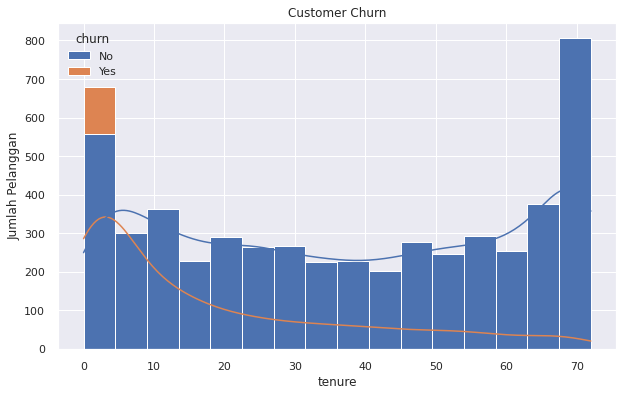

In [18]:
plt.figure(figsize=(10,6))
plt.xlabel("tenure")
plt.ylabel("Jumlah Pelanggan")
plt.title("Customer Churn")
sns.histplot(data=df, x='tenure', hue='churn', alpha=1, kde=True)

**Insight:** 
- We can see that many subscribers have joined the telco in just one month, while quite a few have stayed for approximately 72 months.
- If we look at the results above, customers with the highest churn risk are in the range of 0-10 months. However, this is still unclear, so further segmentation will be carried out based on the tenure of the customer

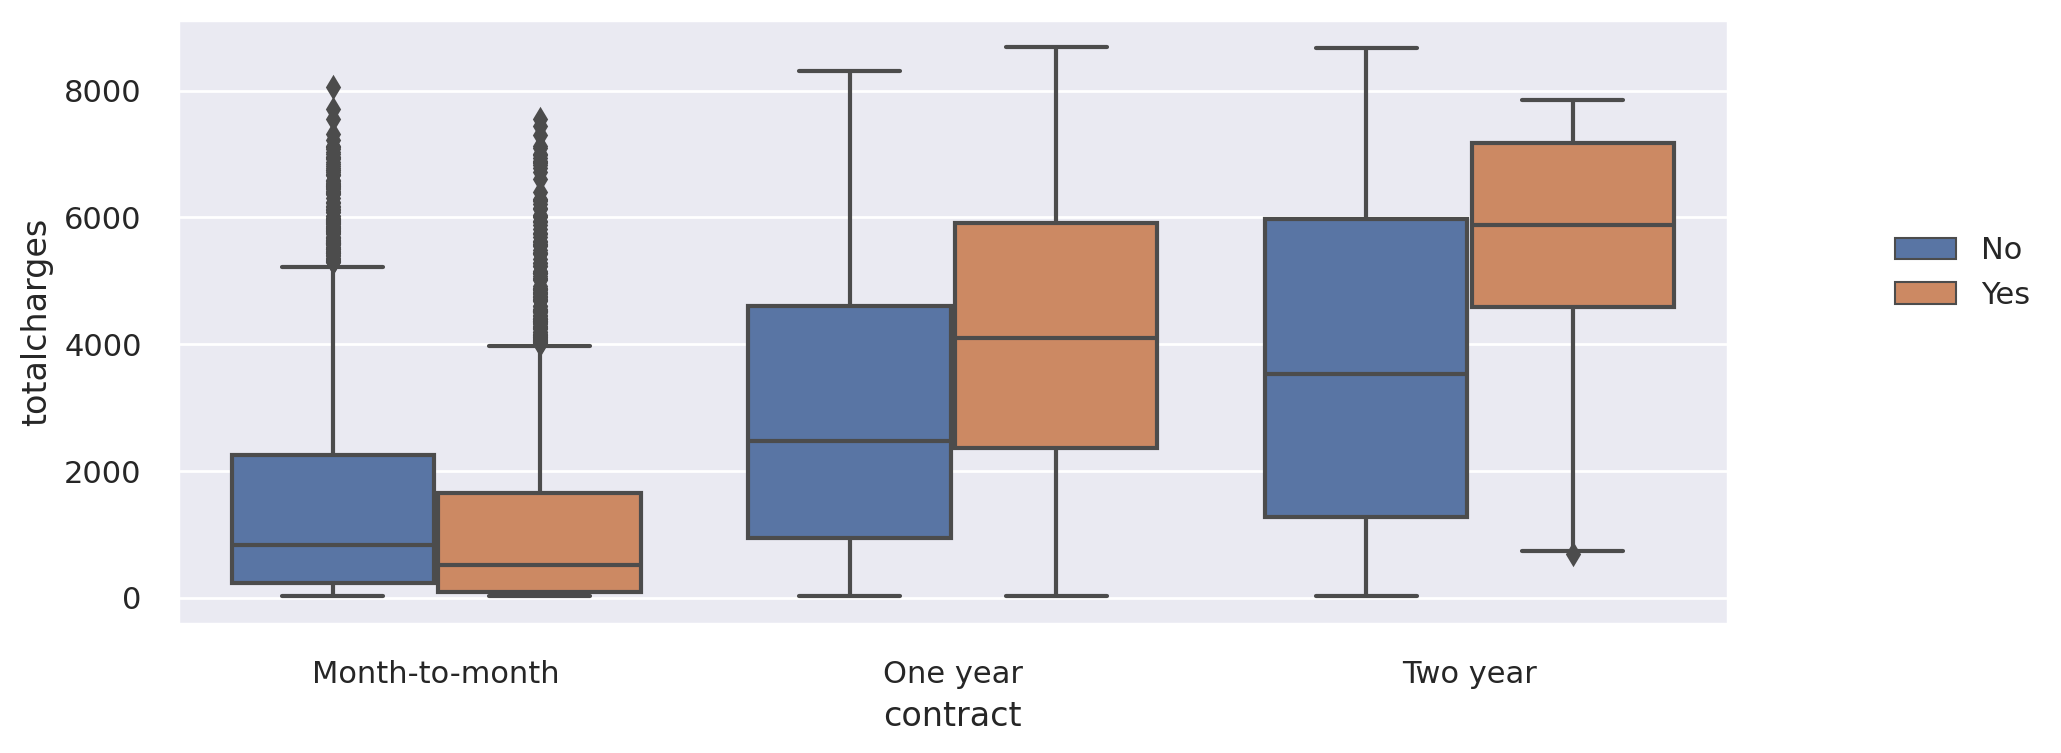

In [19]:
plt.figure(figsize=(10,4), dpi=200)
sns.boxplot(data=df, y='totalcharges', x='contract', hue='churn')
plt.legend(loc=(1.1,0.5))

**Insight:** Seperti bahasan sebelumnya, churn cenderung banyak terjadi saat lama langganan customer < 12 bulan

In [20]:
value_mapper = {'No phone service': 'No phone', 'Fiber optic': 'Fiber',
                'No internet service': 'No internet', 'Month-to-month': 'Monthly',
                'Bank transfer (automatic)': 'Bank transfer',
                'Credit card (automatic)': 'Credit card',
                'One year': '1 Year', 'Two year': '2 Year'}
df.replace(to_replace=value_mapper, inplace=True)

In [21]:
#membuat fungsi visualisasi countplot dengan subplots
def countplots(df, plot, hue):
    sns.set(style='darkgrid')
    fig, axes = plt.subplots(4,4, figsize=(16,15))
    row = 0
    column = 0

    for i, feature in enumerate(df[plot]):
        sns.countplot(x=feature, data=df, hue=hue, ax= axes[row][column], order = df[feature].value_counts().index)
        if column == 3:
            column = 0
            row += 1
        else:
            column +=1
    fig.tight_layout()
    plt.show()

#### Bivariate Analysis

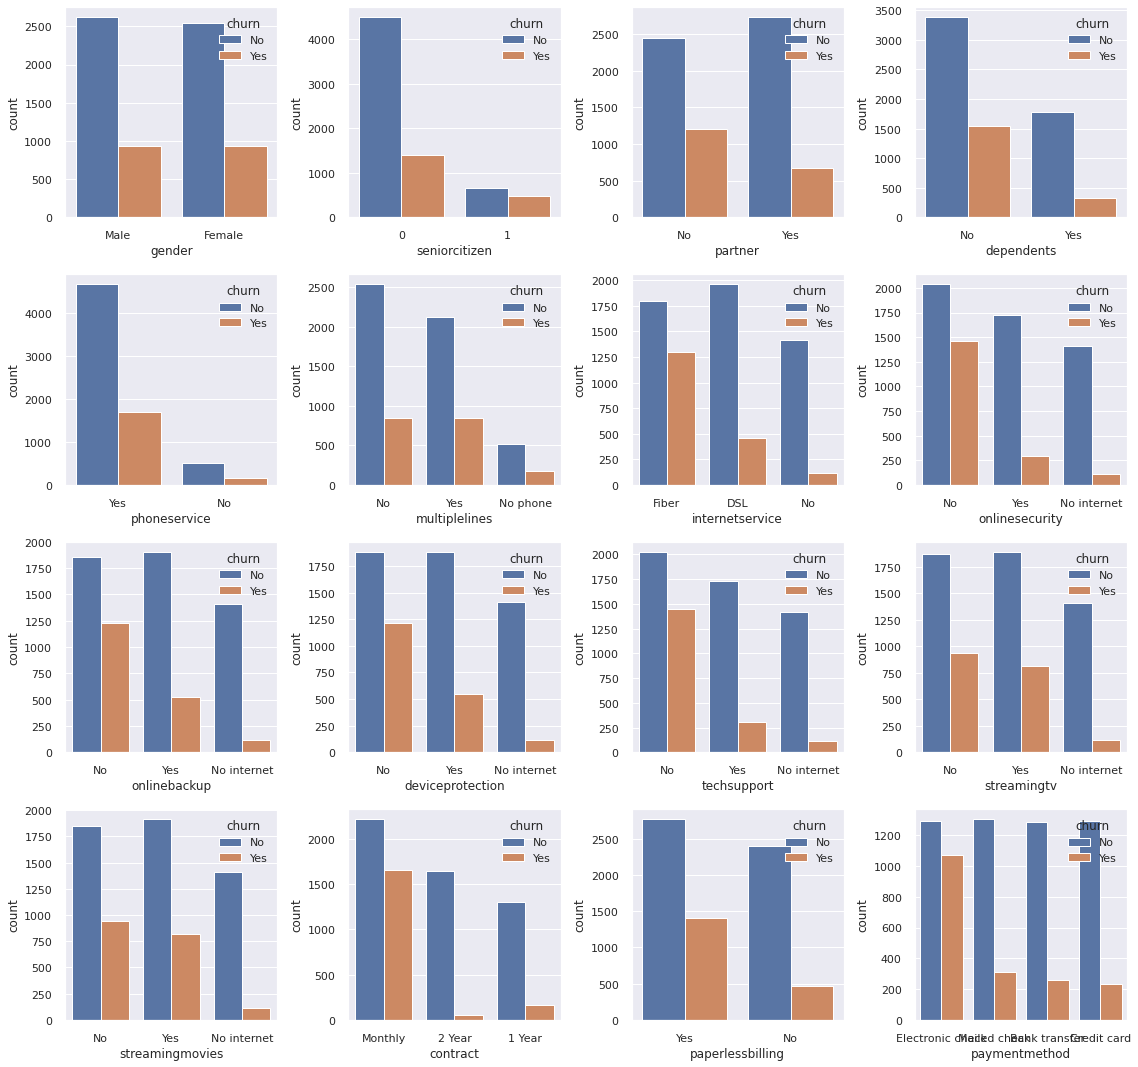

In [22]:
plot_cat = ['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice', 'multiplelines',
             'internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport','streamingtv',
             'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
countplots(df, plot_cat, "churn")

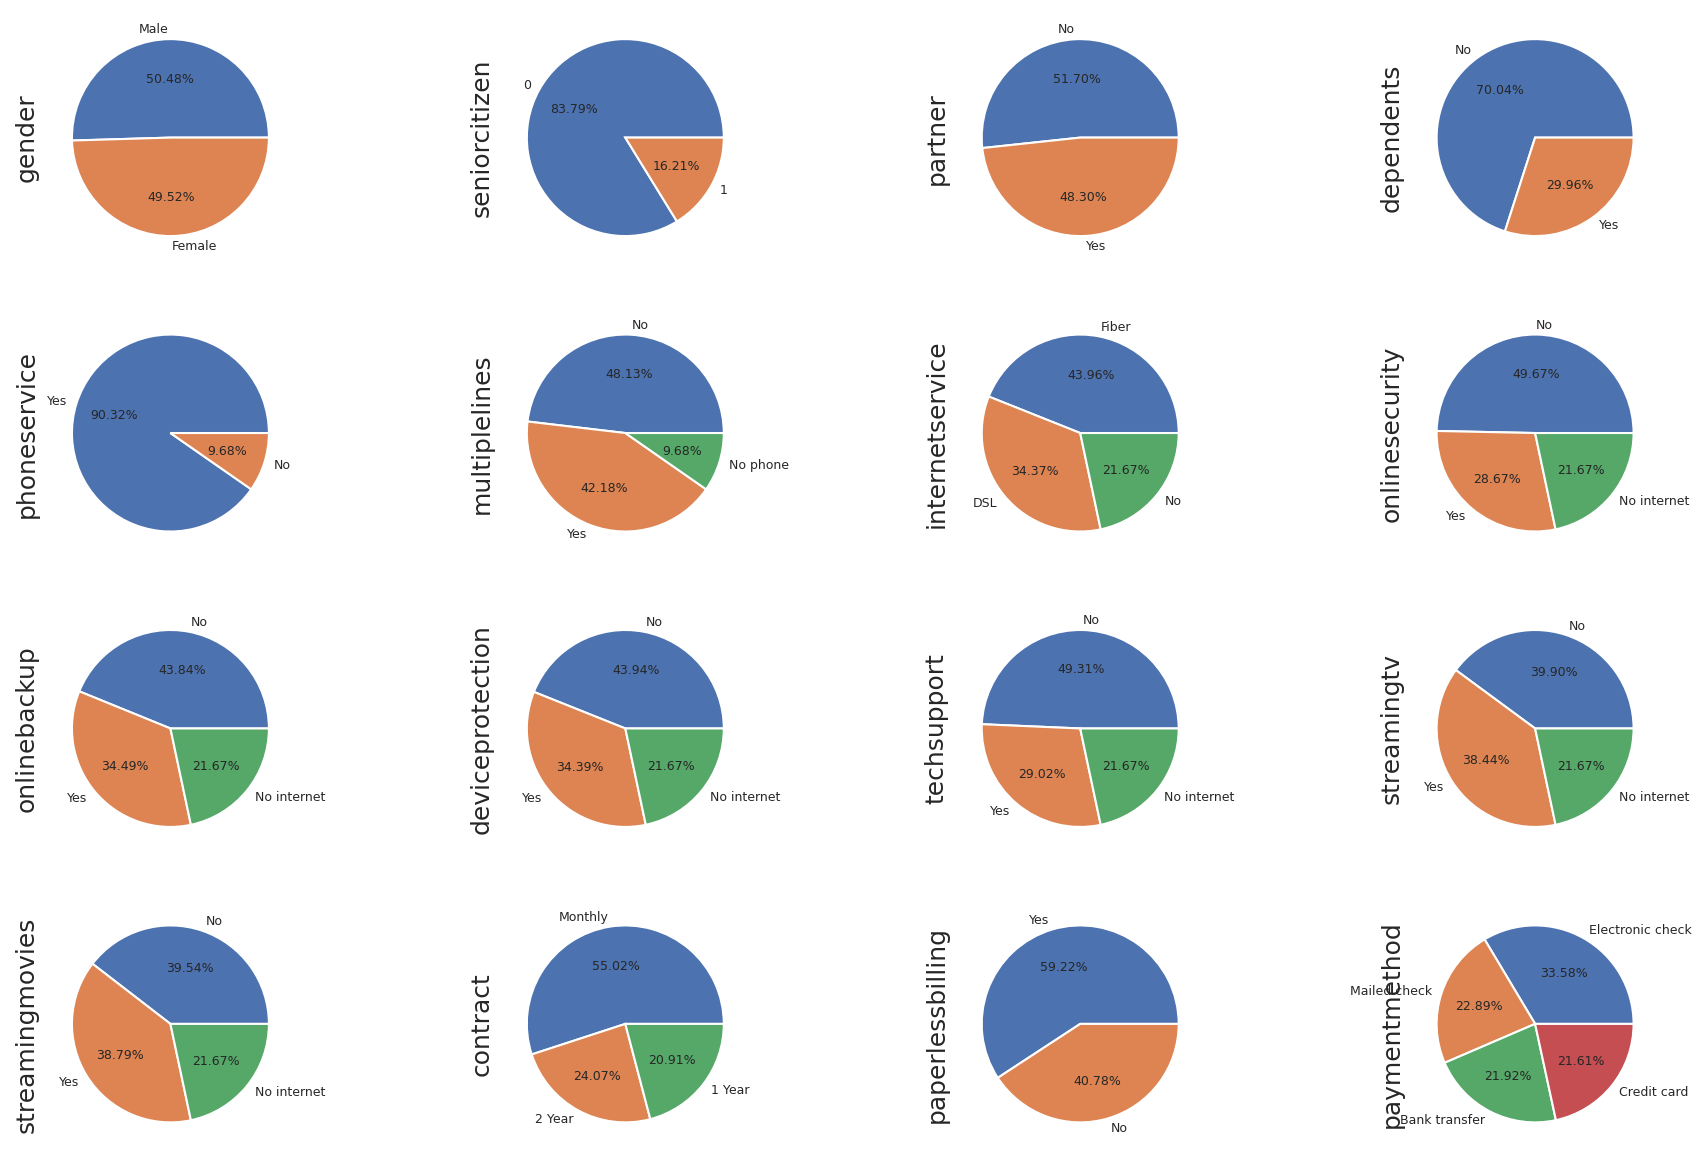

In [23]:
fig = plt.figure(figsize = (15,10), dpi=150)
j=1
for i in plot_cat:
    plt.subplot(4,4,j)
    df[i].value_counts().plot(kind ='pie', autopct = '%1.2f%%', fontsize=6)
    j=j+1

**Insight:** 
- There are only 16.2% of senior citizens. Gender has the same distribution in this data set. About 49% female customers. About 30% of customers have dependents.
- As for some of the services provided, they are distributed fairly evenly in each service, except for phone services where most of the customers use the service by 90%
- Characteristics of customers who churn tend to have categories: fiber optic subscriptions, and not subscribe to many other services, and include customers who subscribe on a month-to-month basis

<Figure size 2000x600 with 0 Axes>

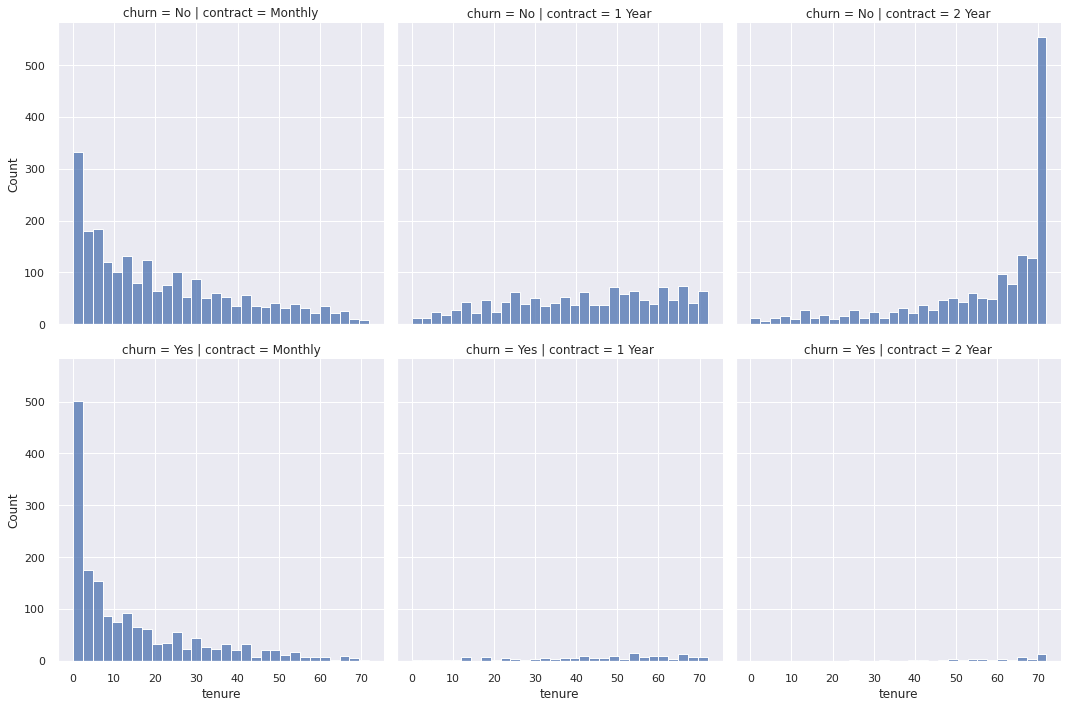

In [24]:
plt.figure(figsize=(10,3), dpi=200)
sns.displot(data=df, x='tenure', bins=30, col='contract', row='churn')

**Insight:** It can be concluded that the biggest churn is in the customer segment with `contract: Monthly`

<AxesSubplot: xlabel='monthlycharges', ylabel='totalcharges'>

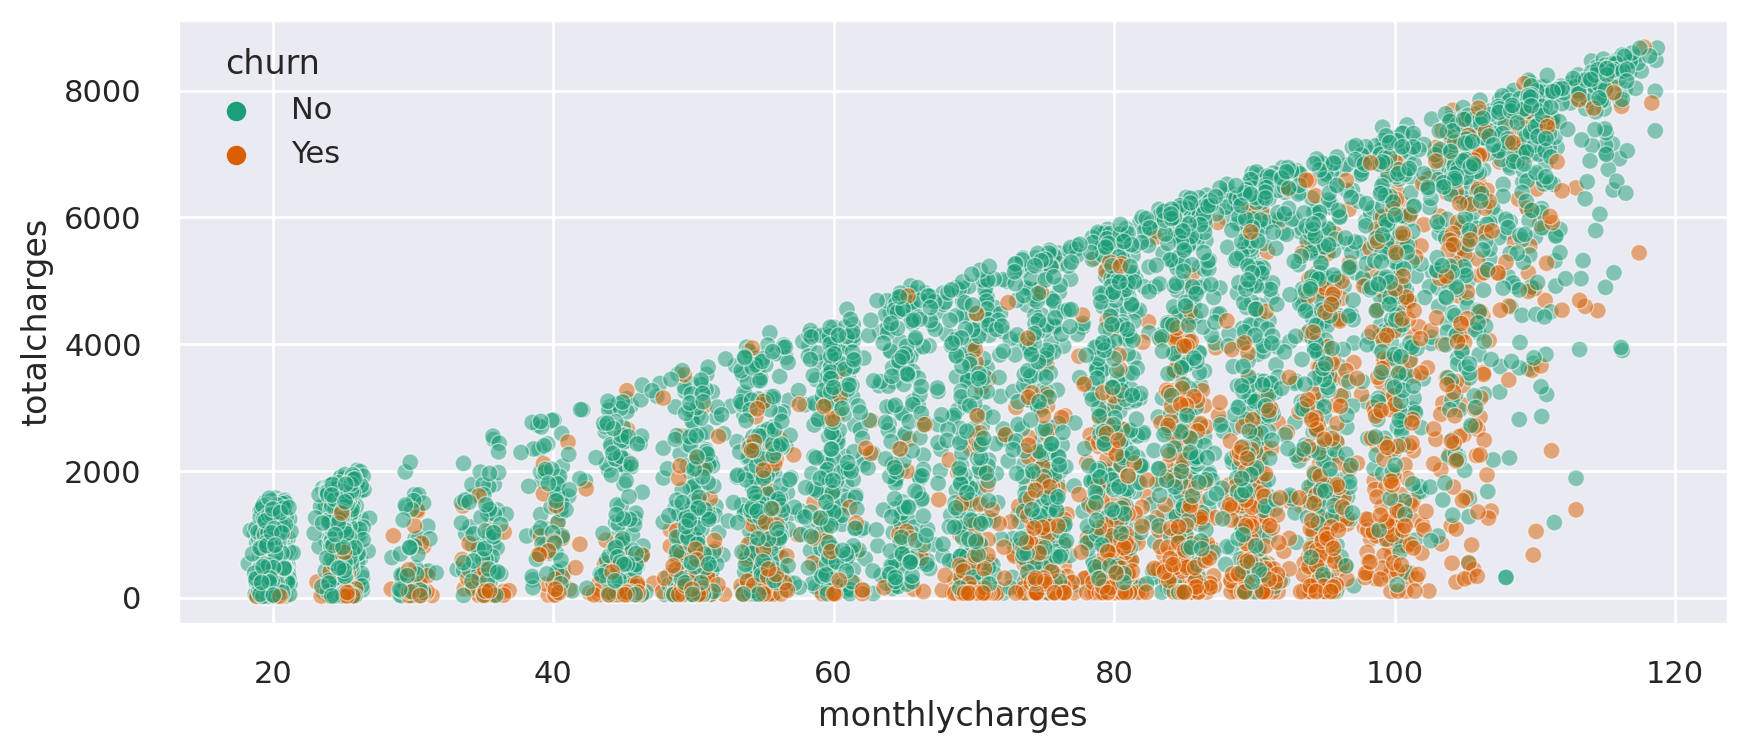

In [25]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df, x='monthlycharges', y='totalcharges', hue='churn', linewidth=0.5, alpha=0.5, palette='Dark2')

**Insight** : From the results of the countplot visualization above, we can see:
- Middle to lower total charge identifies customers who have subscribed not so long ago, and when the monthly charge increases, customer churn tends to occur, for example in the range of 60-120

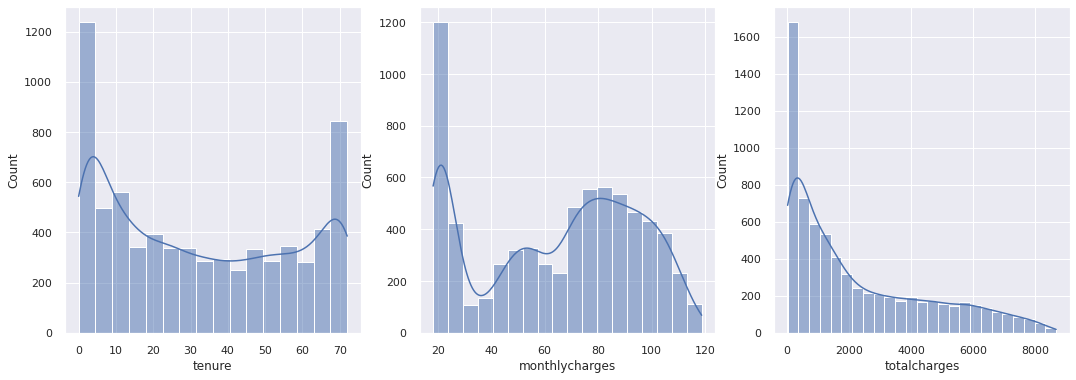

In [26]:
plot_num = ['tenure', 'monthlycharges', 'totalcharges']
fig = plt.figure(figsize=(18,6))
j=1
for i in plot_num:
    plt.subplot(1,3,j)
    sns.histplot(df[i], kde=True)
    j=j+1

**Insight** : 
- As previously explained, many customers survive until the tenure of 70
- while the distribution of the data itself tends to be abnormal

In [27]:
no_churn = df.groupby(['churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['churn','tenure']).count().transpose()['Yes']

In [28]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [29]:
churn_rate.transpose()['customerid']

tenure
0           NaN
1     61.990212
2     51.680672
3     47.000000
4     47.159091
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerid, Length: 73, dtype: float64

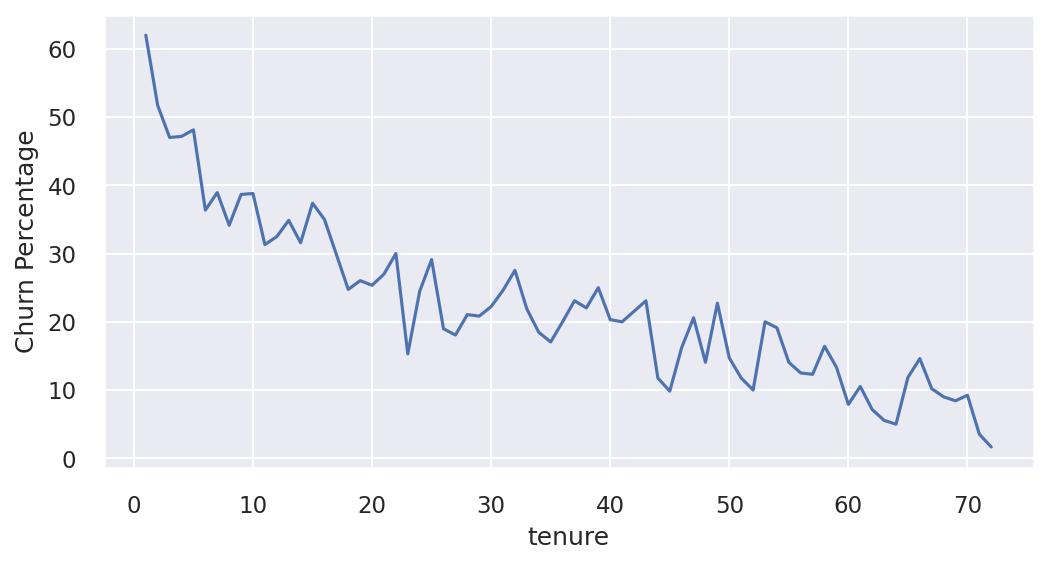

In [30]:
plt.figure(figsize=(8,4), dpi=150)
churn_rate.iloc[0].plot(kind='line')
plt.ylabel('Churn Percentage');

**Insight:** From the tenure trend chart above, we can see that the longer a customer subscribes, the less churn that occurs. So we need to emphasize that new customers have the potential to churn up to 60%.

In [31]:
def segment_tenure(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [32]:
df['segment_tenure'] = df['tenure'].apply(segment_tenure)

In [33]:
df.head(10)[['tenure','segment_tenure']]

,tenure,segment_tenure
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


<AxesSubplot: xlabel='monthlycharges', ylabel='totalcharges'>

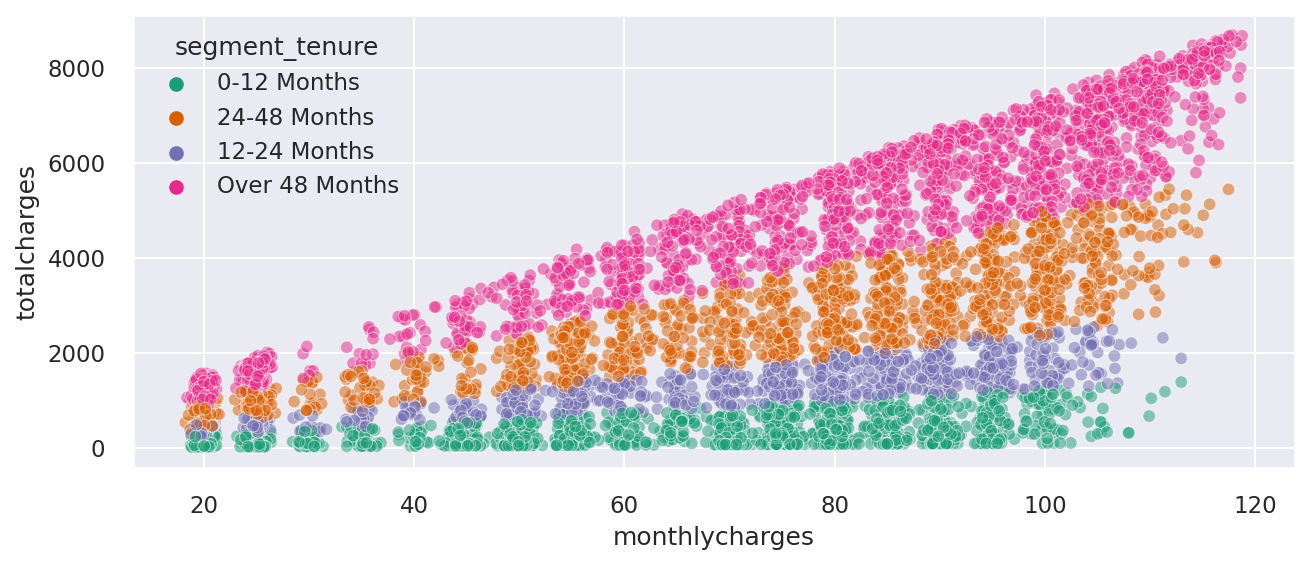

In [34]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df,x='monthlycharges',y='totalcharges',hue='segment_tenure', linewidth=0.5,alpha=0.5,palette='Dark2')

**Insight:** If we segment it based on tenure, then many customers have subscribed for more than 24 months, these are customers that must be maintained because they are the most dominant number of customers in the company

<AxesSubplot: xlabel='segment_tenure', ylabel='count'>

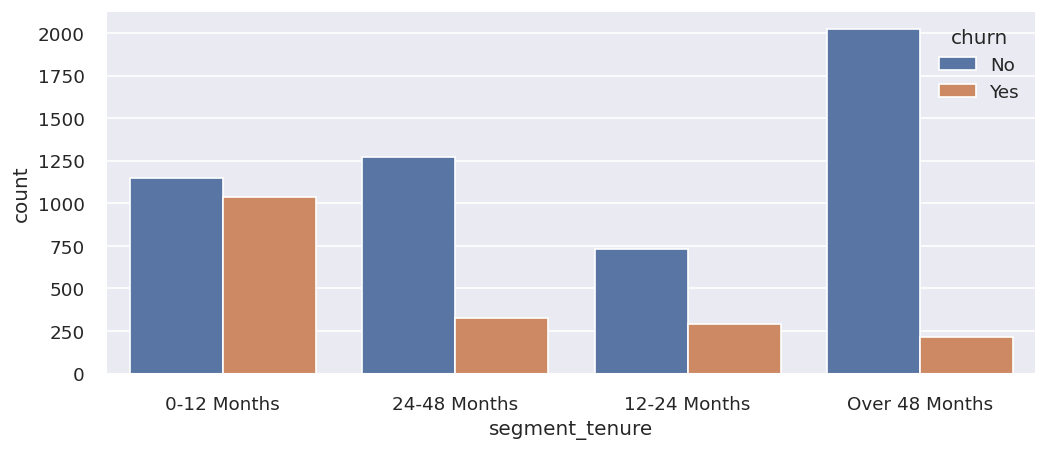

In [35]:
plt.figure(figsize=(10,4),dpi=120)
sns.countplot(data=df, x='segment_tenure', hue='churn')

**Insight** : And this last visualization shows that new customers (0-12 months) have a very high churn tendency - almost equivalent to customers who don't churn.

# 5 - Data Preprocessing (Feature Engineering)
In this section, data preprocessing will be carried out, namely data preparation before entering the modeling area. Then the following process will be carried out:

- Split (Train, Validation, Test, Inference)
- Outlier Detection
- Data Cleaning
- Feature Selection
- Data Balancing (SMOTENC)
- Transform Data (Standarization, Encoding)


_______________________________________________________________________________________________________________________

### Splitting Data

In this section the data will be divided into 4 parts:
- Training Set
- Validation Set
- Test Set
- Inference Set

In [36]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn',
       'segment_tenure'],
      dtype='object')

In [37]:
df.drop(["customerid", "segment_tenure"], axis=1, inplace=True)

In [38]:
#split inference
data_inf = df.sample(20, random_state=23)
data_train_test = df.drop(data_inf.index)

After separating the data that we will test and the inference data above, then we will do a `reset index` so that the two datasets have indexes that are sorted again

In [39]:
#reset index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

The data that we have separated between features and targets, then we will split it into `train and test` using the `train_test_split` function with the parameter `test_size=0.15 (train 85%, test=15%)` and random state 23.

In [40]:
X_train_df, X_test_df = train_test_split(data_train_test, test_size=0.15, random_state=23)

print('Train Size : ', X_train_df.shape)
print('Test Size  : ', X_test_df.shape)

Train Size :  (5969, 20)
Test Size  :  (1054, 20)


We have successfully separated the train and test data, next we will deal with the `outliers and missing values`

### Outliers
Handling outliers is very important before we proceed to model creation, so a function will be created as below:

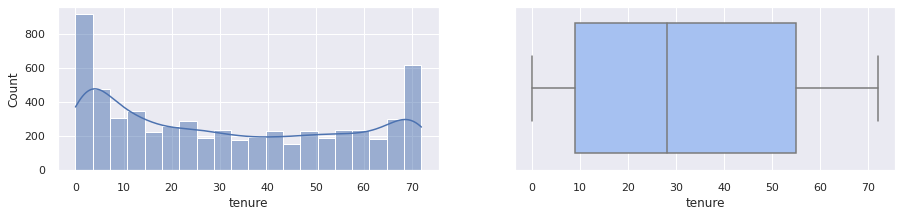

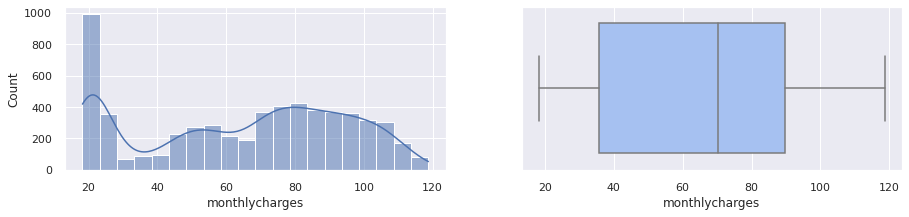

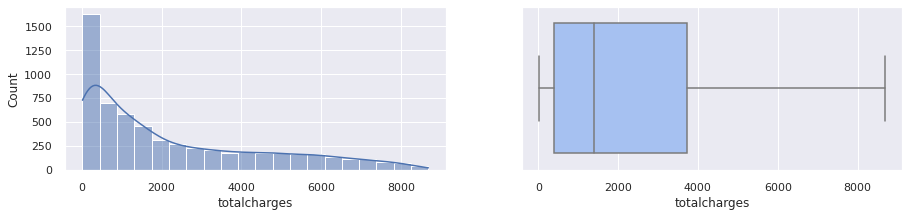

In [41]:
#loop visualisasi histplot dan boxplot
for i in plot_num:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))
    sns.histplot(X_train_df[i], bins=20, kde=True, ax=axs[0]);
    sns.boxplot(X_train_df[i], ax=axs[1], color='#99befd', fliersize=1);

In [42]:
#membuat fungsi untuk mengukur skewness
def show_skew(lt,x):
    print (f'Data     : {x.name}')
    print (f'Skewness : {x.skew()}')
    
    if x.skew() > 0.5:
        print('Skew     : Right skewed')
    elif x.skew() < -0.5:
        print("Skew     : Left Skewed")
    else:
        print("Graph    : Normal Distribution")

#membuat fungsi menampilkan plot histogram dengan density-nya
def show_plot(lt,x):
    matplotlib.rcParams['figure.figsize'] = (10,5)
    show_skew(lt,x)
    plt.hist(x, bins=25, rwidth=1, density=True)
    plt.xlabel(f'{x.name}')
    plt.ylabel('Count')
    aggr = np.arange(x.min(), x.max(), 0.1)
    plt.plot(aggr, stats.norm.pdf(aggr,x.mean(),x.std()))
    
# Memberi label pada plot
    plt.title(lt)
    plt.legend(['Probability Density Function', lt])
    plt.axvline(x.mean(), color='Red', linestyle='dashed', linewidth=3, label='Mean')
    plt.axvline(x.median(), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(x.mode()[0], color='black', linestyle='dashed', linewidth=2)
    plt.show()

From the function that has been created, we will display a visualization that provides information regarding the skewness and distribution of the data

Data     : tenure
Skewness : 0.25806486187123795
Graph    : Normal Distribution


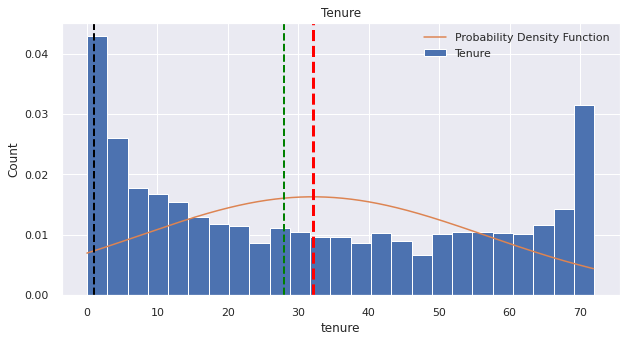

In [43]:
show_plot("Tenure", X_train_df.tenure)

Data     : monthlycharges
Skewness : -0.21474468031649432
Graph    : Normal Distribution


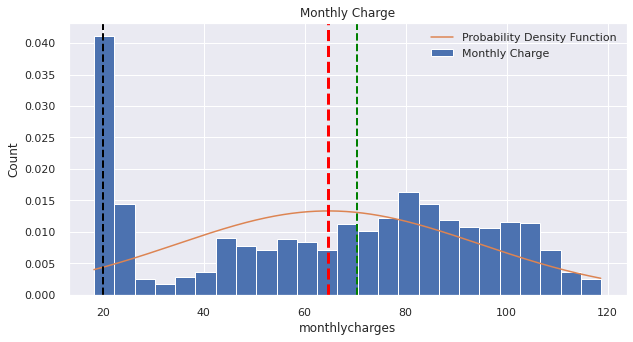

In [44]:
show_plot("Monthly Charge", X_train_df.monthlycharges)

Data     : totalcharges
Skewness : 0.9879111673064278
Skew     : Right skewed


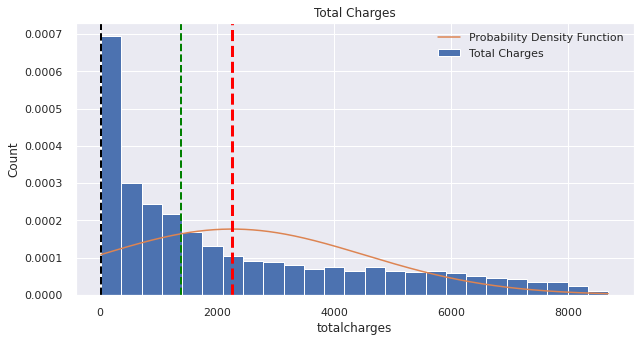

In [45]:
show_plot("Total Charges", X_train_df.totalcharges)

From the visualization above it is known that the distribution of abnormal data is the Total Charges variable which has a `skewness of 0.97` (Right Skewed). we can conclude this is a natural thing.

### Missing Value

In [46]:
X_train_df.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        10
churn                0
dtype: int64

In [47]:
X_test_df.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        1
churn               0
dtype: int64

Based on the data above, it was found that the missing value `(missing value)` for the totalcharges variable was 10 for the train data and 1 for the test data. The consideration for handling this missing value is to 'delete' the data, because imputing it will give noise to the dataset in which we have to know a number of things such as how long the subscription is, and what the services are.

In [48]:
X_train_df = X_train_df.dropna()

In [49]:
X_train_df.isna().sum().sum()

0

In [50]:
X_test_df = X_test_df.dropna()

In [51]:
X_test_df.isna().sum().sum()

0

We have handled the missing value, then we will do feature selection

### Feature Selection
In the feature selection section, the data will first be split into:
- Numerical Data
- Categorical Data

#### Check Correlatioin

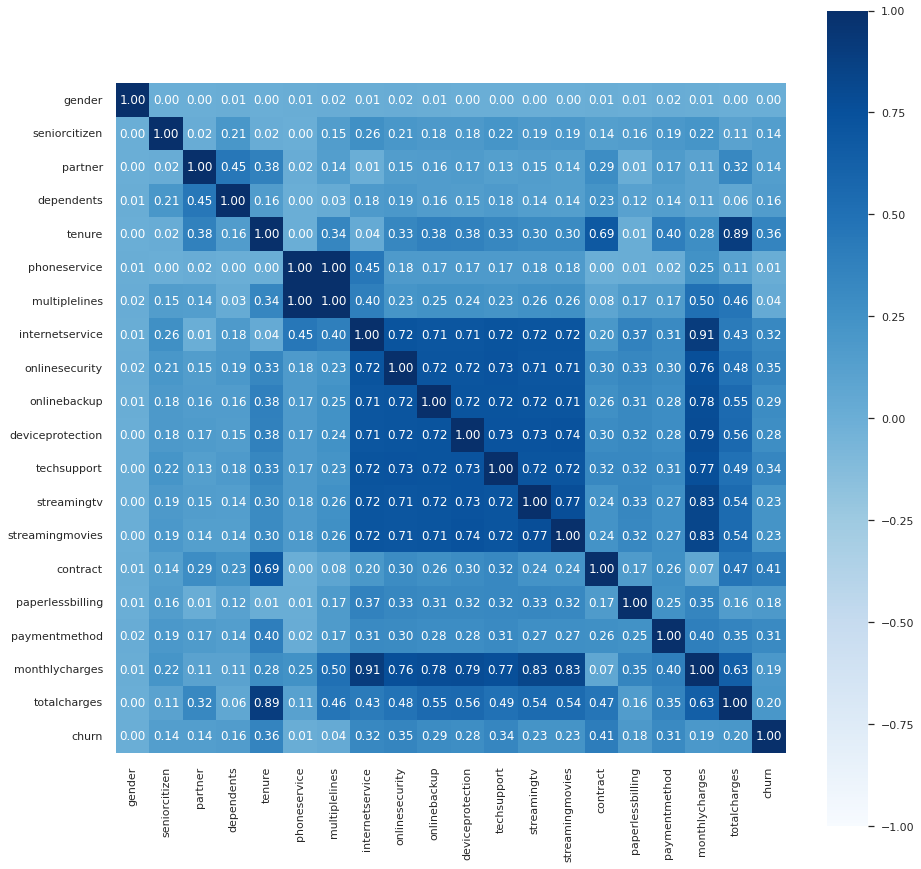

{'corr':                     gender  seniorcitizen   partner  dependents    tenure  \
 gender            1.000000       0.004394  0.004148    0.012565  0.003442   
 seniorcitizen     0.004394       1.000000  0.021545    0.209593  0.021817   
 partner           0.004148       0.021545  1.000000    0.449371  0.376929   
 dependents        0.012565       0.209593  0.449371    1.000000  0.162311   
 tenure            0.003442       0.021817  0.376929    0.162311  1.000000   
 phoneservice      0.011730       0.003824  0.018389    0.001921  0.001788   
 multiplelines     0.016768       0.151761  0.143685    0.025179  0.342678   
 internetservice   0.014310       0.261910  0.007492    0.177557  0.036312   
 onlinesecurity    0.021928       0.210395  0.151018    0.190157  0.334680   
 onlinebackup      0.009981       0.182551  0.161238    0.161814  0.383130   
 deviceprotection  0.003928       0.182446  0.166542    0.154840  0.381740   
 techsupport       0.004515       0.219846  0.132876    

In [52]:
associations(X_train_df, numerical_columns=['tenure','monthlycharges','totalcharges'],
             nom_nom_assoc='cramer',num_num_assoc='spearman', cramers_v_bias_correction=False,
             figsize=(15, 15), cmap="Blues")

**Insight:**
- Numerical and numeric variables are calculated using Spearman correlation, while values for numeric and categorical variables are calculated using `the Cramers v method`
- Based on the correlation value here we can see that there is `multicollinearity`, for example between `internetservices and monthlycharges`. Since in this problem the coefficients are not interpreted and the main goal is to construct a classifier with high predictive power they are ignored.

In [53]:
corr_df  = pd.get_dummies(X_train_df[['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod','churn']]).corr(method='spearman')

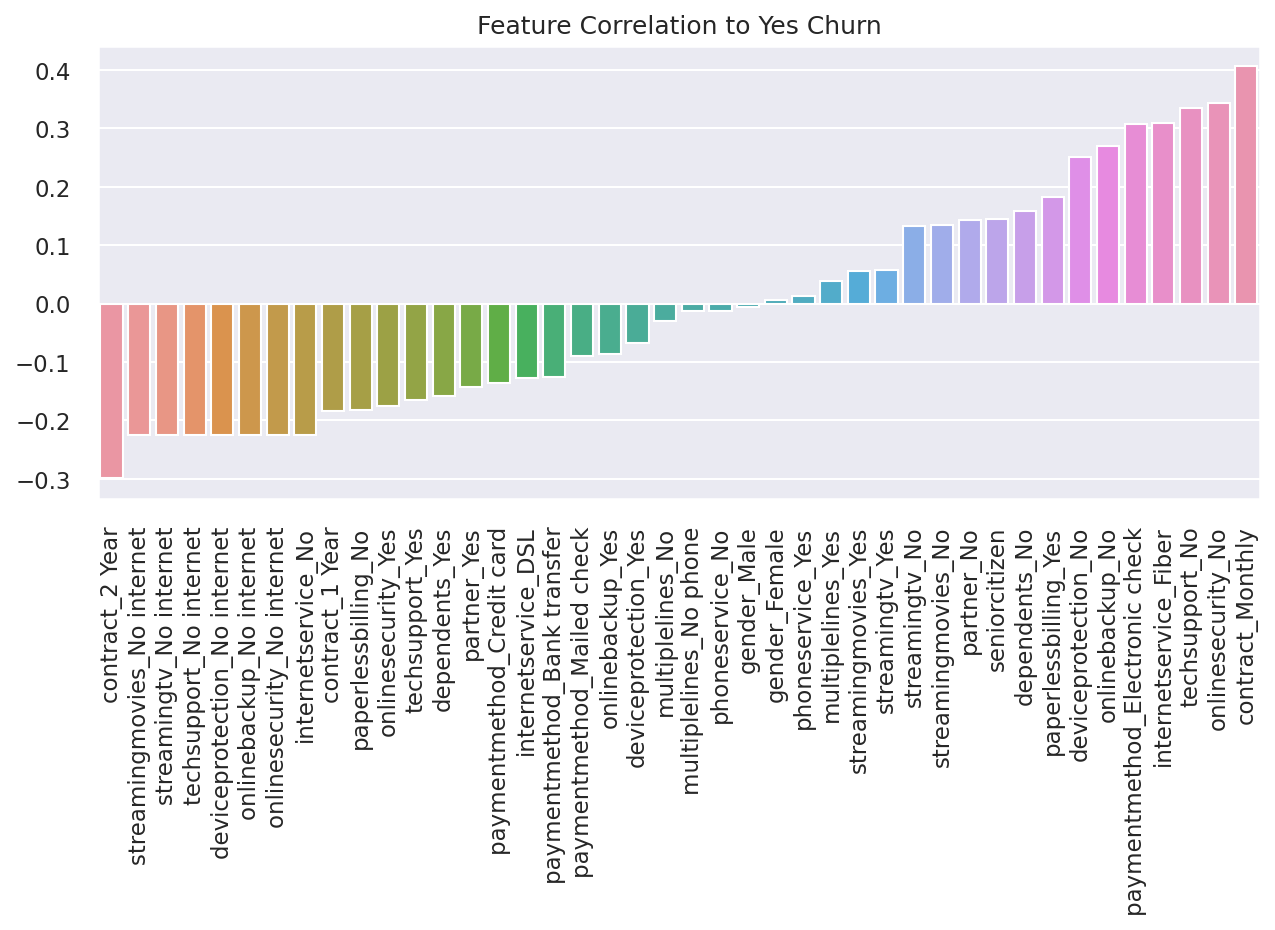

In [54]:
plt.figure(figsize=(10,4), dpi=150)
sns.barplot(x=corr_df['churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

**Anlysis:** From the results above, the type of `contract Monthly` has a high correlation with the occurrence of churn (Churn Yes)<br>
**Feature Drop**
- churn - gender        : 0.004986
- churn - phoneservice  : 0.012231      
- churn - multiplelines : 0.038508 

Based on the results of the correlation test, we will drop these 3 features for future modeling

In [55]:
#drop unnecesarry features
X_train_df.drop(['gender', 'phoneservice',  'multiplelines'], axis=1, inplace=True)
X_test_df.drop(['gender', 'phoneservice',  'multiplelines'], axis=1, inplace=True)

#### Convert Data to Category

In [56]:
def find_categorical(df, cutoff=10):
    cat_cols = []
    for col in df.columns:
        if len(df[col].unique()) <= cutoff:
            cat_cols.append(col)
    return cat_cols

def to_categorical(columns, df):
    for col in columns:
        df[col] = df[col].astype('category')
    return df

In [57]:
X_train_df = to_categorical(find_categorical(X_train_df), X_train_df)
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5959 entries, 2765 to 595
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   seniorcitizen     5959 non-null   category
 1   partner           5959 non-null   category
 2   dependents        5959 non-null   category
 3   tenure            5959 non-null   int64   
 4   internetservice   5959 non-null   category
 5   onlinesecurity    5959 non-null   category
 6   onlinebackup      5959 non-null   category
 7   deviceprotection  5959 non-null   category
 8   techsupport       5959 non-null   category
 9   streamingtv       5959 non-null   category
 10  streamingmovies   5959 non-null   category
 11  contract          5959 non-null   category
 12  paperlessbilling  5959 non-null   category
 13  paymentmethod     5959 non-null   category
 14  monthlycharges    5959 non-null   float64 
 15  totalcharges      5959 non-null   float64 
 16  churn             5959

In [59]:
target = 'churn'
X_train_val, y_train_val = X_train_df.drop(columns=[target]), X_train_df[target]
X_test, y_test = X_test_df.drop(columns=[target]), X_test_df[target]
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val)
print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (4469, 16)
Val Size   :  (1490, 16)
Test Size  :  (1053, 16)


#### Balancing Data with SMOTE-NC.
**Oversampling using SMOTE-NC** because this method can be used for mixed (categorical and continuous) features. This is why we need to use SMOTE-NC when we have mixed data cases. The premise is simple, we indicate which features are categorical, and SMOTE-NC will resample the categorical data instead of generating synthetic data.

- References: https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5

In [60]:
smotenc = SMOTENC(categorical_features=(X_train.dtypes == "category").values, random_state = 23)

In [61]:
X_train, y_train = smotenc.fit_resample(X_train, y_train)

In [62]:
pd.Series(y_train).value_counts()

No     3277
Yes    3277
Name: churn, dtype: int64

In [63]:
X_val, y_val = smotenc.fit_resample(X_val, y_val)

In [64]:
pd.Series(y_val).value_counts()

No     1092
Yes    1092
Name: churn, dtype: int64

From the balancing results above, the data already has the same churn label/class

In [65]:
#mapping target
y_train = y_train.map({'No':0, 'Yes':1})
y_test = y_test.map({'No':0, 'Yes':1})
y_val = y_val.map({'No':0, 'Yes':1})

#### Scaling & Encoding

In [66]:
# Get Numerical Columns and Categorical Columns
numeric_columns = ['tenure', 'monthlycharges', 'totalcharges']
category_columns = ['seniorcitizen', 'partner','dependents', 'paperlessbilling','internetservice', 'onlinesecurity', 
                    'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv','streamingmovies', 'contract', 'paymentmethod']

In [67]:
#make pipeline
num_pipe = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())
cat_pipe = make_pipeline(OneHotEncoder(drop='first', handle_unknown ='ignore'))

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipe, numeric_columns),
    ('pipe_cat', cat_pipe, category_columns)
])

In [68]:
# scaling and encoding
X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(6554, 26)

# 6 - Model Definition
Artificial neural networks (ANNs), usually simply called neural networks (NNs) or neural nets, are computing systems inspired by the biological neural networks that constitute animal brains.
An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron receives signals then processes them and can signal neurons connected to it. The "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges. Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold.


##### References
- https://en.wikipedia.org/wiki/Artificial_neural_network

## Pipeline (Tensorflow)

In [165]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(100).repeat(3).shuffle(100)
test_pipe  = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(100)
val_pipe   = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(100)

In [73]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

input_shape = X_train.shape[1]

In [210]:
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights= True
)

## 6.1 - Sequential Default

In [214]:
model_seq_def = Sequential()
model_seq_def.add(Dense(8, activation='relu', input_shape=(input_shape,)))
model_seq_def.add(Dense(16, activation='relu')) 
model_seq_def.add(Dense(1, activation='sigmoid'))

# Compile
model_seq_def.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=[tf.keras.metrics.BinaryAccuracy()])

model_seq_def.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 8)                 216       
                                                                 
 dense_139 (Dense)           (None, 16)                144       
                                                                 
 dense_140 (Dense)           (None, 1)                 17        
                                                                 
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


**Note:** 
- This model uses 2 hidden layers and 1 output with 26 feature inputs (results of encoding)
- Binary Accuracy calculates how often predictions match binary labels.
- Activation function relu is used because ReLU greatly speeds up the convergence process carried out with stochastic gradient descent when compared to sigmoid / tanh
- sigmoid is used because the label is binary

In [ ]:
tf.keras.utils.plot_model(model_seq_def, show_shapes=True)

## 6.2 - Sequential Tune

In [230]:
model_seq_tune = Sequential()
model_seq_tune.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(input_shape,)))
model_seq_tune.add(tf.keras.layers.Dropout(0.1))
model_seq_tune.add(tf.keras.layers.Dense(50, activation='relu')) 
model_seq_tune.add(tf.keras.layers.Dropout(0.1))
model_seq_tune.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile
model_seq_tune.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=[tf.keras.metrics.BinaryAccuracy(threshold=(0.6))])

model_seq_tune.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_141 (Dense)           (None, 50)                1350      
                                                                 
 dropout_39 (Dropout)        (None, 50)                0         
                                                                 
 dense_142 (Dense)           (None, 50)                2550      
                                                                 
 dropout_40 (Dropout)        (None, 50)                0         
                                                                 
 dense_143 (Dense)           (None, 1)                 51        
                                                                 
Total params: 3,951
Trainable params: 3,951
Non-trainable params: 0
_________________________________________________________________


**Note:** 
- This model uses 2 hidden layers with each 50 neuron and 1 output with 26 feature inputs (results of encoding)
- This model is improved by adding a dropout and threshold of 0.6
- Binary Accuracy calculates how often predictions match binary labels.
- Activation function relu is used because ReLU greatly speeds up the convergence process carried out with stochastic gradient descent when compared to sigmoid / tanh
- sigmoid is used because the label is binary

In [ ]:
tf.keras.utils.plot_model(model_seq_tune, show_shapes=True)

## 6.3 - Functional API Default

In [245]:
input_layer = Input(shape=(input_shape,))
h1_layer = Dense(8, activation='relu')(input_layer)
h2_layer = Dense(32, activation='relu')(h1_layer)
output_layer = Dense(1, activation='sigmoid')(h2_layer)

model_func_def = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_func_def.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=[tf.keras.metrics.BinaryAccuracy()])

model_func_def.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 26)]              0         
                                                                 
 dense_167 (Dense)           (None, 8)                 216       
                                                                 
 dense_168 (Dense)           (None, 32)                288       
                                                                 
 dense_169 (Dense)           (None, 1)                 33        
                                                                 
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


**Note:** 
- This model uses 2 hidden layers with 8 and 32 neuron and 1 output with 26 feature inputs (results of encoding)
- Binary Accuracy calculates how often predictions match binary labels.
- Activation function relu is used because ReLU greatly speeds up the convergence process carried out with stochastic gradient descent when compared to sigmoid / tanh
- sigmoid is used because the label is binary

In [ ]:
tf.keras.utils.plot_model(model_func_def, show_shapes=True)

## 6.4 - Functional API Tune

In [246]:
input_layer = Input(shape=(input_shape,))
h1_layer = Dense(50, activation='relu')(input_layer)
h2_layer = Dense(50, activation='relu')(h1_layer)
h3_layer = Dense(128, activation='relu')(h2_layer)
merge = concatenate([h1_layer, h3_layer])
output_layer = Dense(1, activation='sigmoid')(merge)

model_func_tune = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_func_tune.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=[tf.keras.metrics.BinaryAccuracy(threshold=(0.6))])

model_func_tune.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 26)]         0           []                               
                                                                                                  
 dense_170 (Dense)              (None, 50)           1350        ['input_9[0][0]']                
                                                                                                  
 dense_171 (Dense)              (None, 50)           2550        ['dense_170[0][0]']              
                                                                                                  
 dense_172 (Dense)              (None, 128)          6528        ['dense_171[0][0]']              
                                                                                            

**Note:** 
- This model uses 3 hidden layers with 50, 50, and 128 neuron and 1 output with 26 feature inputs (results of encoding)
- In this model, merging is done for hidden layer 1 and layer 3
- This model is improved by adding a dropout and threshold of 0.6
- Binary Accuracy calculates how often predictions match binary labels.
- Activation function relu is used because ReLU greatly speeds up the convergence process carried out with stochastic gradient descent when compared to sigmoid / tanh
- sigmoid is used because the label is binary

In [ ]:
tf.keras.utils.plot_model(model_func_tune, show_shapes=True)

# 7 - Model Training

## 7.1 Sequential Default

In [215]:
%%time
history_seq_def = model_seq_def.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=earlystop)

Epoch 1/50
198/198 [==============================] - 2s 7ms/step - loss: 0.5950 - binary_accuracy: 0.6859 - val_loss: 0.4891 - val_binary_accuracy: 0.7683
Epoch 2/50
198/198 [==============================] - 1s 3ms/step - loss: 0.4558 - binary_accuracy: 0.7881 - val_loss: 0.4426 - val_binary_accuracy: 0.7940
Epoch 3/50
198/198 [==============================] - 1s 3ms/step - loss: 0.4286 - binary_accuracy: 0.8008 - val_loss: 0.4331 - val_binary_accuracy: 0.8063
Epoch 4/50
198/198 [==============================] - 1s 3ms/step - loss: 0.4200 - binary_accuracy: 0.8034 - val_loss: 0.4313 - val_binary_accuracy: 0.8045
Epoch 5/50
198/198 [==============================] - 1s 3ms/step - loss: 0.4158 - binary_accuracy: 0.8087 - val_loss: 0.4348 - val_binary_accuracy: 0.7976
Epoch 6/50
198/198 [==============================] - 1s 3ms/step - loss: 0.4117 - binary_accuracy: 0.8086 - val_loss: 0.4281 - val_binary_accuracy: 0.8082
Epoch 7/50
198/198 [==============================] - 1s 3ms/ste

## 7.2 Sequential Tune

In [231]:
%%time
history_seq_tune = model_seq_tune.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=earlystop)

Epoch 1/50
198/198 [==============================] - 1s 4ms/step - loss: 0.4934 - binary_accuracy: 0.7315 - val_loss: 0.4340 - val_binary_accuracy: 0.8146
Epoch 2/50
198/198 [==============================] - 1s 3ms/step - loss: 0.4170 - binary_accuracy: 0.8038 - val_loss: 0.4210 - val_binary_accuracy: 0.8141
Epoch 3/50
198/198 [==============================] - 1s 3ms/step - loss: 0.4097 - binary_accuracy: 0.8066 - val_loss: 0.4196 - val_binary_accuracy: 0.8136
Epoch 4/50
198/198 [==============================] - 1s 3ms/step - loss: 0.4041 - binary_accuracy: 0.8134 - val_loss: 0.4131 - val_binary_accuracy: 0.8150
Epoch 5/50
198/198 [==============================] - 1s 3ms/step - loss: 0.3989 - binary_accuracy: 0.8137 - val_loss: 0.4132 - val_binary_accuracy: 0.8086
Epoch 6/50
198/198 [==============================] - 1s 3ms/step - loss: 0.3949 - binary_accuracy: 0.8146 - val_loss: 0.4119 - val_binary_accuracy: 0.8091
Epoch 7/50
198/198 [==============================] - 1s 3ms/ste

**Analysis**: Based on the results of a comparison between the `Sequential Default model and the Improved Model`, there has been an increase in several things, namely:
- Default -> Improve
- total time = 23.5 -> 10.3 (improve)
- loss = 0.392 -> 0.377 (improve)
- val loss = 0.427 -> 0.420 (improve)
- binary accuracy = 0.823 -> 0.825 (improve)
- val binary accuracy = 0.806 -> 0.810 (improve)

**it can be concluded that we managed to improve the model**

## 7.3 Functional API Default

In [247]:
%%time
history_func_def = model_func_def.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=earlystop)

Epoch 1/50
198/198 [==============================] - 1s 4ms/step - loss: 0.5803 - binary_accuracy: 0.7211 - val_loss: 0.4700 - val_binary_accuracy: 0.7830
Epoch 2/50
198/198 [==============================] - 1s 3ms/step - loss: 0.4502 - binary_accuracy: 0.7944 - val_loss: 0.4338 - val_binary_accuracy: 0.7985
Epoch 3/50
198/198 [==============================] - 1s 3ms/step - loss: 0.4306 - binary_accuracy: 0.8001 - val_loss: 0.4246 - val_binary_accuracy: 0.8017
Epoch 4/50
198/198 [==============================] - 1s 3ms/step - loss: 0.4215 - binary_accuracy: 0.8052 - val_loss: 0.4206 - val_binary_accuracy: 0.8004
Epoch 5/50
198/198 [==============================] - 1s 3ms/step - loss: 0.4159 - binary_accuracy: 0.8089 - val_loss: 0.4273 - val_binary_accuracy: 0.8045
Epoch 6/50
198/198 [==============================] - 1s 3ms/step - loss: 0.4159 - binary_accuracy: 0.8097 - val_loss: 0.4195 - val_binary_accuracy: 0.8013
Epoch 7/50
198/198 [==============================] - 1s 3ms/ste

## 7.4 Functional API Tune

In [248]:
%%time
history_func_tune = model_func_tune.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=earlystop)

Epoch 1/50
198/198 [==============================] - 1s 4ms/step - loss: 0.4609 - binary_accuracy: 0.7661 - val_loss: 0.4221 - val_binary_accuracy: 0.8040
Epoch 2/50
198/198 [==============================] - 1s 4ms/step - loss: 0.4055 - binary_accuracy: 0.8090 - val_loss: 0.4177 - val_binary_accuracy: 0.8049
Epoch 3/50
198/198 [==============================] - 1s 3ms/step - loss: 0.3930 - binary_accuracy: 0.8157 - val_loss: 0.4241 - val_binary_accuracy: 0.8036
Epoch 4/50
198/198 [==============================] - 1s 3ms/step - loss: 0.3845 - binary_accuracy: 0.8221 - val_loss: 0.4341 - val_binary_accuracy: 0.7972
Epoch 5/50
198/198 [==============================] - 1s 3ms/step - loss: 0.3844 - binary_accuracy: 0.8227 - val_loss: 0.4250 - val_binary_accuracy: 0.8063
Epoch 6/50
198/198 [==============================] - 1s 3ms/step - loss: 0.3761 - binary_accuracy: 0.8276 - val_loss: 0.4236 - val_binary_accuracy: 0.8031
Epoch 7/50
198/198 [==============================] - 1s 3ms/ste

**Analysis**: Based on the results of a comparison between the `Functional API Default model and the Improved Model`, there has been an increase in several things, namely:
- Default -> Improve
- total time = 29.4 -> 6.9 (improve)
- loss = 0.3886 -> 0.3672 (improve)
- val loss = 0.4154 -> 0.4460 (improve)
- binary accuracy = 0.8251 -> 0.8332 (improve)
- val binary accuracy = 0.8086 -> 0.7995 (not improve)

**it can be concluded that we managed to improve the model**

# 8 - Model Evaluation


## 8.1 - Sequential Default

In [249]:
history_seq_def_df = pd.DataFrame(history_seq_def.history)

<AxesSubplot: >

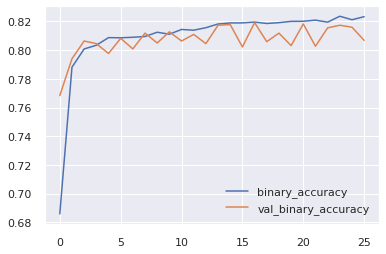

In [250]:
history_seq_def_df[['binary_accuracy', 'val_binary_accuracy']].plot()

<AxesSubplot: >

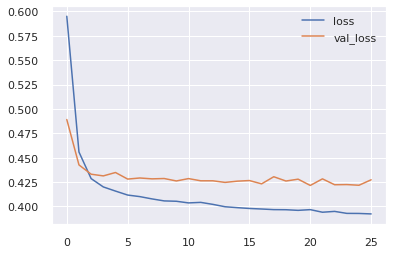

In [251]:
history_seq_def_df[['loss', 'val_loss']].plot()

In [252]:
y_pred_seq_def = model_seq_def.predict(X_test)
y_pred_seq_def = np.where(y_pred_seq_def >=0.5, 1, 0)
print(classification_report(y_test, y_pred_seq_def))

33/33 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       776
           1       0.52      0.70      0.60       277

    accuracy                           0.75      1053
   macro avg       0.70      0.74      0.71      1053
weighted avg       0.78      0.75      0.76      1053



Text(63.0, 0.5, 'Truth')

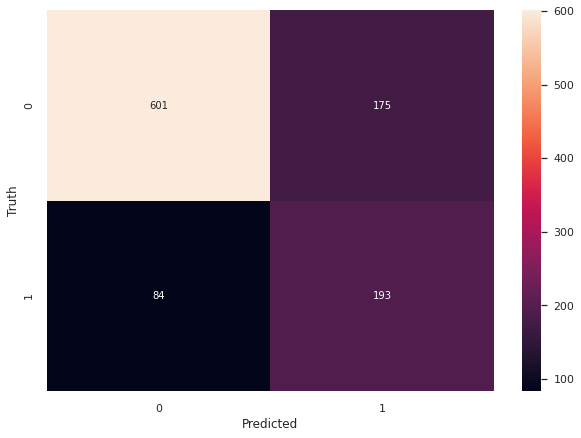

In [253]:
cm_seq_def = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_seq_def)
plt.figure(figsize = (10,7))
sns.heatmap(cm_seq_def, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

**Analysis** : Sequential Default
- Based on the lineplot, it exploded on val_binary_accuracy, while for loss there was a pretty good decrease even though the validation error value was still above train
- Based on the classification report, `the F1 Score for label 0 tends to have a better value (0.82)` than the F1 Score for label 1 (0.60), **this is caused by unbalanced data**, even though it `has been balanced with SMOTENC` but there is still noise.
- From the results of the confusion matrix, the results are more errors in the prediction of label 1

## 8.2 Sequential Tune

In [258]:
history_seq_tune_df = pd.DataFrame(history_seq_tune.history)

<AxesSubplot: >

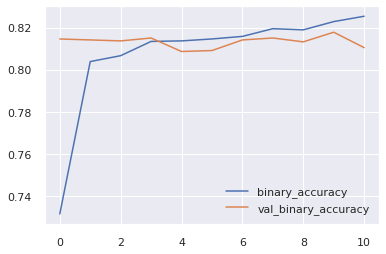

In [259]:
history_seq_tune_df[['binary_accuracy', 'val_binary_accuracy']].plot()

<AxesSubplot: >

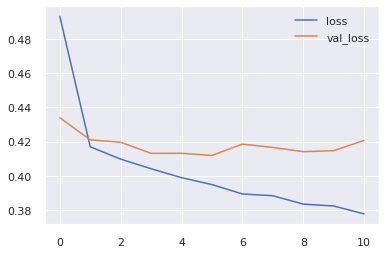

In [265]:
history_seq_tune_df[['loss', 'val_loss']].plot()

In [280]:
y_pred_seq_tune = model_seq_tune.predict(X_test)
y_pred_seq_tune = np.where(y_pred_seq_tune >=0.5, 1, 0)
print(classification_report(y_test, y_pred_seq_tune))

33/33 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       776
           1       0.52      0.68      0.59       277

    accuracy                           0.75      1053
   macro avg       0.70      0.73      0.71      1053
weighted avg       0.78      0.75      0.76      1053



Text(63.0, 0.5, 'Truth')

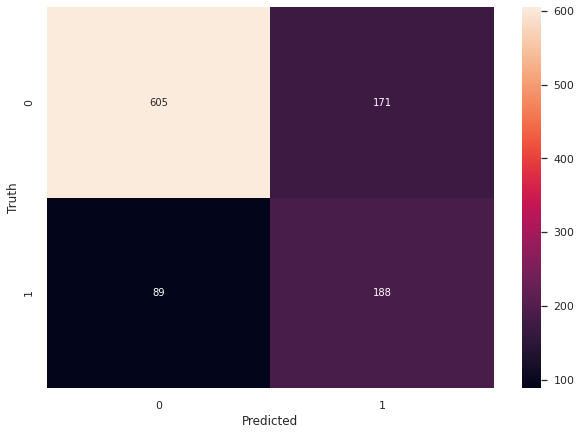

In [264]:
cm_seq_tune = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_seq_tune)
plt.figure(figsize = (10,7))
sns.heatmap(cm_seq_tune, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

**Analysis** : Sequential Improve
- Based on the val_binary_accuracy lineplot, `it has a flat trend that tends to vanish`, while for loss there is a fairly good decline even though the validation error value (val loss) is still above the train
- Based on the classification report, the F1 score for `label 0 tends to have a better value (0.82)` than the F1 score for label 1 (0.59), as explained earlier, this is due to unbalanced data. but from the results of this improved model we managed to **reduce** the error value in label **1 where the previous error was 175 to 171**
- From the results of the confusion matrix, even though label 1 gets a reduction in errors, label 0 gets an increase in errors

## 8.3 Functional API Default

In [271]:
history_func_def_df = pd.DataFrame(history_func_def.history)

<AxesSubplot: >

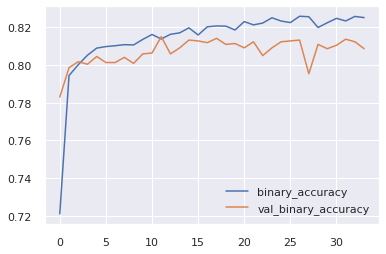

In [272]:
history_func_def_df[['binary_accuracy', 'val_binary_accuracy']].plot()

<AxesSubplot: >

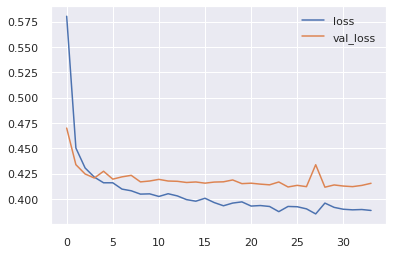

In [273]:
history_func_def_df[['loss', 'val_loss']].plot()

In [274]:
y_pred_func_def = model_func_def.predict(X_test)
y_pred_func_def = np.where(y_pred_func_def >=0.5, 1, 0)
print(classification_report(y_test, y_pred_func_def))

33/33 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       776
           1       0.51      0.67      0.58       277

    accuracy                           0.75      1053
   macro avg       0.69      0.72      0.70      1053
weighted avg       0.78      0.75      0.76      1053



Text(63.0, 0.5, 'Truth')

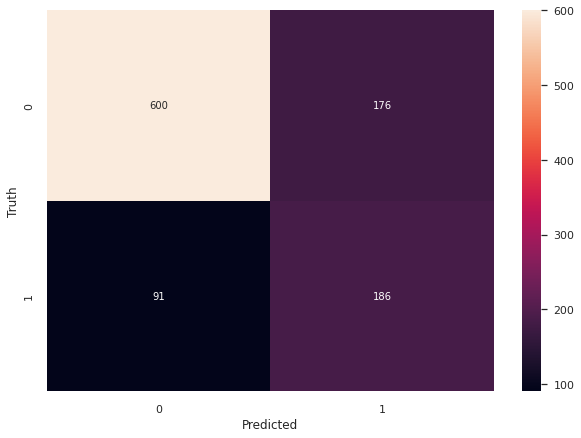

In [275]:
cm_func_def = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_func_def)
plt.figure(figsize = (10,7))
sns.heatmap(cm_func_def, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

**Analysis** : Functional API Default
- Based on the lineplot, accuracy and loss have similarities where there is an explosion, even if it's a little, here between train and validation, the values are close to the same, even though the validation error values are above the train.
- Based on the classification report, the F1 score for label 0 tends to have a better value (0.82) than the F1 score for label 1 (0.58), as explained this is caused by unbalanced data. The results on the default functional model are similar to the results obtained by default sequential
- From the results of the confusion matrix the model tends to predict label 1 but actually it is label 0, this is the same as in the sequential model

## 8.4 Functional API Tune

In [266]:
history_func_tune_df = pd.DataFrame(history_func_tune.history)

<AxesSubplot: >

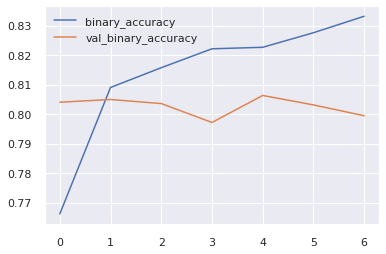

In [267]:
history_func_tune_df[['binary_accuracy', 'val_binary_accuracy']].plot()

<AxesSubplot: >

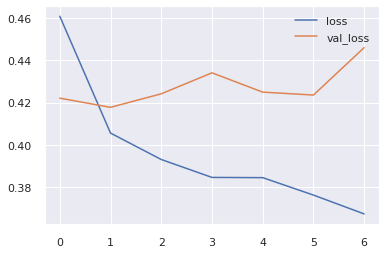

In [268]:
history_func_tune_df[['loss', 'val_loss']].plot()

In [281]:
y_pred_func_tune = model_func_tune.predict(X_test)
y_pred_func_tune = np.where(y_pred_func_tune >=0.5, 1, 0)
print(classification_report(y_test, y_pred_func_tune))

33/33 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       776
           1       0.53      0.72      0.61       277

    accuracy                           0.76      1053
   macro avg       0.71      0.75      0.72      1053
weighted avg       0.79      0.76      0.77      1053



Text(63.0, 0.5, 'Truth')

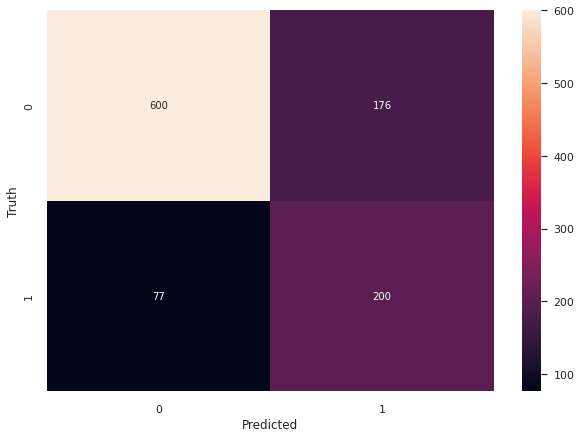

In [277]:
cm_func_tune = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_func_tune)
plt.figure(figsize = (10,7))
sns.heatmap(cm_func_tune, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

**Analysis** : Functional API Tune
- Based on the lineplot between the train and validation values there is a significant difference, the same goes for data loss and loss validation, this is not expected because the model tends to **overfitting**
- Based on the classification report, the F1 score for label `0 tends to have a better value (0.83)` than the F1 score for `label 1 (0.61)`, as explained this is caused by unbalanced data. **The results of the functional model that has been improved show better F1 score results than the default**, where there is an increase in the precision and recall of label 1, namely `(51-> 53 | 67-> 72)`
- From the results of the confusion matrix the model tends to predict label 1 but in fact it is label 0, this is the same as in the default and sequential functional models

# 9 - Model Saving
Save the model that has been created to be later deployed and tested against data inference

In [282]:
with open('final_pipeline.pkl', 'wb') as file_1:
  joblib.dump(final_pipeline, file_1)

In [283]:
model_func_tune.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 26)]         0           []                               
                                                                                                  
 dense_170 (Dense)              (None, 50)           1350        ['input_9[0][0]']                
                                                                                                  
 dense_171 (Dense)              (None, 50)           2550        ['dense_170[0][0]']              
                                                                                                  
 dense_172 (Dense)              (None, 128)          6528        ['dense_171[0][0]']              
                                                                                            

In [284]:
# Freeze Model
model_func_tune.trainable = False
model_func_tune.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 26)]         0           []                               
                                                                                                  
 dense_170 (Dense)              (None, 50)           1350        ['input_9[0][0]']                
                                                                                                  
 dense_171 (Dense)              (None, 50)           2550        ['dense_170[0][0]']              
                                                                                                  
 dense_172 (Dense)              (None, 128)          6528        ['dense_171[0][0]']              
                                                                                            

In [285]:
#save ann model Functional API
model_func_tune.save('customer_churn_model.h5')

## 9.1 - Inferencing


In [286]:
# Load The Models
with open('final_pipeline.pkl', 'rb') as file_1:
  model_pipeline = joblib.load(file_1)

from tensorflow.keras.models import load_model
model_ann = load_model('customer_churn_model.h5')

In [287]:
data_inf.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Male,0,Yes,No,63,Yes,No,Fiber,Yes,No,Yes,No,Yes,Yes,2 Year,No,Credit card,99.70,6330.4,No
1,Female,0,Yes,Yes,45,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,2 Year,Yes,Mailed check,81.00,3533.6,No
2,Female,1,No,No,5,Yes,No,Fiber,Yes,Yes,No,No,No,No,Monthly,No,Electronic check,80.70,374.8,No
3,Male,1,No,No,35,Yes,Yes,Fiber,No,No,Yes,No,Yes,Yes,Monthly,Yes,Electronic check,101.40,3496.3,Yes
4,Female,0,Yes,No,61,Yes,Yes,Fiber,No,No,No,Yes,Yes,Yes,1 Year,No,Bank transfer,101.15,6383.9,No


In [ ]:
data_inf_transform = model_pipeline.transform(data_inf)
data_inf_transform

In [289]:
y_pred_inf = model_ann.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 56ms/step


array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0]])

# 10 - Overall Analysis (Conclution)

## EDA & Preprocessing
- Based on the number, there are `26.54%` of customers who churn. Meanwhile, based on the total charges, there is a churn of `17.83%.`
- There are only `16.2%` senior citizens. Gender has the same distribution in this data set.
- Based on tenure trends, the longer a customer subscribes, the less churn tends to be. So we need to emphasize that new customers have the potential to churn up to `60%`. `New customers (0-12 months of contract) have a very high tendency to churn`
- Contract type` Monthly` has a high correlation with the occurrence of churn `(Churn Yes)`
- For imbalance data, we manage it use `SMOTENC`

## Model Definition & Training
- The model used is **Artificial Neural Network, with Sequential and Functional API**
- Of the two models, the model that has been `improved` shows better performance in terms of increasing precision and recall in the classification report
- The ANN model with** Functional API (Improved)** was chosen as the best model for deployment.
- Based on the classification report, the F1 score for label `0 tends to have a better value (0.83)` than the F1 score for `label 1 (0.61)`, as explained this is caused by unbalanced data. **The results of the functional model that has been improved show better F1 score results than the default**, where there is an increase in the precision and recall of label 1 **`(51-> 53 | 67-> 72)**

#### Suggestion
- Do more specific EDA to review customer behavior
- Use more specific methods to improve the performance of the ANN model
- Perform scoring on features with several other methods to improve model performance